In [ ]:
!nvidia-smi

Thu Jun 16 07:15:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Clone repository

In [ ]:
!git clone https://github.com/Qiulin-W/SAFA.git
%cd SAFA

Cloning into 'SAFA'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 55 (delta 9), reused 53 (delta 7), pack-reused 0
Unpacking objects: 100% (55/55), done.
/content/SAFA


### Dependencies and preparation

In [ ]:
# pytorch3d

!pip install -U fvcore
!pip install -U iopath

#!pip install pytorch3d
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html


# SAFA requirements
#!pip install -r requirements.txt


# FLAME2020
!unzip "/content/drive/MyDrive/Диплом/safa/FLAME2020.zip" -d "/content/flame2020/"
%mkdir /content/SAFA/modules/data
%cp /content/flame2020/generic_model.pkl /content/SAFA/modules/data/


# DECA/data
!unzip "/content/drive/MyDrive/Диплом/safa/DECA_data.zip" -d "/content/DECA_data/"
%mkdir /content/SAFA/module
%mkdir /content/SAFA/module/data
%cp /content/DECA_data/head_template.obj /content/SAFA/modules/data/
%cp /content/DECA_data/head_template.obj /content/SAFA/module/data/
%cp /content/DECA_data/landmark_embedding.npy /content/SAFA/modules/data/
%cp /content/DECA_data/landmark_embedding.npy /content/SAFA/module/data/
%cp /content/DECA_data/uv_face_eye_mask.png /content/SAFA/modules/data/
%cp /content/DECA_data/uv_face_eye_mask.png /content/SAFA/module/data/
%cp /content/DECA_data/uv_face_mask.png /content/SAFA/modules/data/
%cp /content/DECA_data/uv_face_mask.png /content/SAFA/module/data/


# Chekpoints
%mkdir /content/SAFA/ckpt
%cp /content/drive/MyDrive/Диплом/safa/final_3DV.tar /content/SAFA/ckpt/
%cp /content/drive/MyDrive/Диплом/safa/final_3DV.zip /content/SAFA/ckpt/
!unzip "/content/SAFA/ckpt/final_3DV.zip" -d "/content/SAFA/ckpt/"


# (Optional, required by the face swap demo) Pretrained face parser
%mkdir /content/SAFA/face_parsing
%mkdir /content/SAFA/face_parsing/cp
%cp /content/drive/MyDrive/Диплом/safa/79999_iter.pth /content/SAFA/face_parsing/cp/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 32.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=6ca02e9a503231b44e2719de9e71786bf9722b64df56db9307b2dff113063280
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py37_cu113_pyt1110/download.html
     |████████████████████████████████| 43.2 MB 1.2 MB/s 
Archive:  /content/drive/MyDrive/Диплом/safa/FLAME2020.zip
  inflating: /con

In [ ]:
!pip install PyYAML==5.3.1
!pip install chumpy
!pip install face-alignment
%cd /content/SAFA/
!git clone https://github.com/zllrunning/face-parsing.PyTorch
%mv /content/SAFA/face-parsing.PyTorch/ /content/SAFA/face_parsing/
%mv /content/SAFA/face_parsing/resnet.py /content/SAFA/
!pip install -U imageio
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 14.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=b0dce9bfe8013f7122da9d4af49032c4edbec0a8d68189388127b8c76d20c3f5
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.8 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58285 sha256=054b78d15ce860b156e2f73732541874918405cd49cff2365325f9b0e9edbeb4
  Stored in directory: /root/.cache/pip/wheels/59/68/de/5e0c5d77e573e8c150e69e07a25035e6b6a04952d6e

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 92.5 MB/s 


### Demos

In [ ]:
# Animation demo
%cd /content/SAFA
!python animation_demo.py --config config/end2end.yaml --checkpoint /content/SAFA/ckpt/final_3DV.tar --source_image_pth /content/egor.png --driving_video_pth /content/daniel_radcliffe.mp4 --relative --adapt_scale --find_best_frame

/content/SAFA
animation_demo.py:194: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_image = imageio.imread(opt.source_image_pth)
animation_demo.py:32: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
blend_scale:  1
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
creating the FLAME Decoder
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:534: UserWarning: Mtl file does not

In [ ]:
# Face swap for preprocessed source images and driving videos
!python face_swap_demo.py --config config/end2end.yaml --checkpoint /content/SAFA/ckpty --source_image_pth path/to/source_image --driving_video_pth path/to/driving_video

Traceback (most recent call last):
  File "face_swap_demo.py", line 19, in <module>
    from modules.tdmm_estimator import TDMMEstimator
  File "/content/SAFA/modules/tdmm_estimator.py", line 7, in <module>
    from pytorch3d.io import load_obj
ModuleNotFoundError: No module named 'pytorch3d'


In [ ]:
# Face swap for arbitrary images and videos
#%cd /content/SAFA
!python face_swap_demo.py --config config/end2end.yaml --checkpoint /content/SAFA/ckpt/final_3DV.tar --source_image_pth /content/SAFA/input/image.jpg --driving_video_pth /content/SAFA/input/SKALADZhONSONChTOTOOBYaSNYaET.mp4 --use_detection

### Evaluation / Inference

In [ ]:
# Video Reconstrucion
!python run_ddp.py --config config/end2end.yaml --checkpoint path/to/checkpoint --mode reconstruction

In [ ]:
# Image Animation
!python run_ddp.py --config config/end2end.yaml --checkpoint /content/SAFA/ckpt/final_3DV.tar --mode animate

run_ddp.py:58: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
blend_scale:  1
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
creating the FLAME Decoder
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:533: UserWarning: Mtl file does not exist: ./modules/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
Traceback (most recent call last):
  File "run_ddp.py", line 78, in <module>
    dataset = FramesDataset(is_train=(opt.mode == 'train'), **config['dataset_params'])
  File "/content/SAFA/frames_dataset.py", line 69, in __init__
    self.videos = os.listdir(root_

In [ ]:
# 3D Face Reconstruction
!python tdmm_inference.py --data_dir directory/to/images --tdmm_checkpoint path/to/tdmm_checkpoint_pth

### Postprocessing

In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P /content/GFPGAN/experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 431 (delta 0), reused 4 (delta 0), pack-reused 426
Receiving objects: 100% (431/431), 5.36 MiB | 1.67 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 13.5 MB/s 
     |████████████████████████████████| 5.8 MB 65.4 MB/s 
     |████████████████████████████████| 190 kB 69.0 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194483 sha256=c5b5ec1b90035481246e20bd96236957f5f4b4b9bcabeb347f8da4678073f4d7
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.2 to easy-install.pth file

Installed /content/GFPGAN
Processing dependencies for gfpgan==1.3.2
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /us

0 second pass
1 second pass
2 second pass
3 second pass
4 second pass
5 second pass
Can't receive frame (stream end?). Exiting ...
total frames: 218


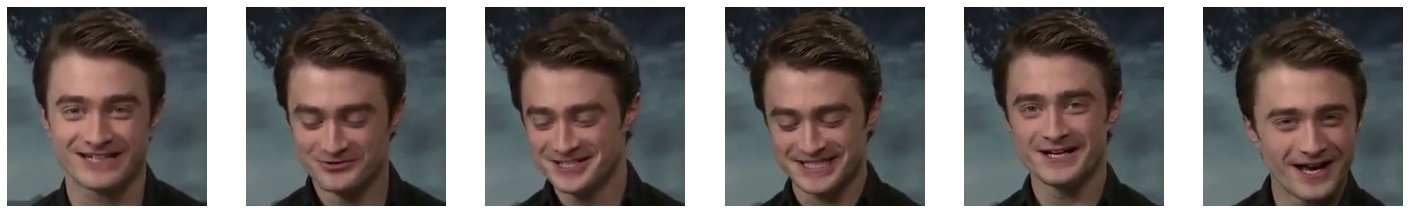

In [ ]:
# importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
import shutil
from PIL import Image
import math

def display(imgs):
    fig = plt.figure(figsize=(25, 10))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1, len(imgs), i + 1)
        ax.axis('off')
        ax.imshow(img)

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('/content/daniel_radcliffe.mp4')
frames = []
frames_per_second = []
second = 0
count = 0
n_digits = round(math.log10(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))) + 1
n_out_frame = round(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) / 6)
fps = cap.get(cv2.CAP_PROP_FPS)

#upload_folder = '/content/GFPGAN/inputs/upload'
#if os.path.isdir(upload_folder):
#    shutil.rmtree(upload_folder)
#os.mkdir(upload_folder)

# Loop until the end of the video
while (cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv2.imwrite(f"{upload_folder}/frame{count:0>{n_digits}}.jpg", frame)
    frames.append(frame)

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    count += 1
 
    # Display the resulting frame
    if (len(frames) % n_out_frame) == 0:
        print(f"{second} second pass")
        frames_per_second.append(frame)
        second += 1
    
    if cv2.waitKey(10) == 27:
        break
 
# release the video capture object
print(f'total frames: {count}')
cap.release()
display(frames_per_second)

In [ ]:
!zip -r /content/frames.zip /content/GFPGAN/inputs/upload

updating: content/GFPGAN/inputs/upload/ (stored 0%)
updating: content/GFPGAN/inputs/upload/frame088.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame134.jpg (deflated 2%)
updating: content/GFPGAN/inputs/upload/frame149.jpg (deflated 2%)
updating: content/GFPGAN/inputs/upload/frame103.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame090.jpg (deflated 2%)
updating: content/GFPGAN/inputs/upload/frame072.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame029.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame028.jpg (deflated 4%)
updating: content/GFPGAN/inputs/upload/frame205.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame013.jpg (deflated 4%)
updating: content/GFPGAN/inputs/upload/frame003.jpg (deflated 4%)
updating: content/GFPGAN/inputs/upload/frame173.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame098.jpg (deflated 3%)
updating: content/GFPGAN/inputs/upload/frame086.jpg (deflated 2%)
updating: content/GFPGAN

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
%cd /content/GFPGAN
!rm -rf /content/GFPGAN/results
!python inference_gfpgan.py -i /content/GFPGAN/inputs/upload -o /content/GFPGAN/results -v 1.3 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

!ls /content/GFPGAN/results/cmp

/content/GFPGAN
Processing frame000.jpg ...
	Tile 1/1
Processing frame001.jpg ...
	Tile 1/1
Processing frame002.jpg ...
	Tile 1/1
Processing frame003.jpg ...
	Tile 1/1
Processing frame004.jpg ...
	Tile 1/1
Processing frame005.jpg ...
	Tile 1/1
Processing frame006.jpg ...
	Tile 1/1
Processing frame007.jpg ...
	Tile 1/1
Processing frame008.jpg ...
	Tile 1/1
Processing frame009.jpg ...
	Tile 1/1
Processing frame010.jpg ...
	Tile 1/1
Processing frame011.jpg ...
	Tile 1/1
Processing frame012.jpg ...
	Tile 1/1
Processing frame013.jpg ...
	Tile 1/1
Processing frame014.jpg ...
	Tile 1/1
Processing frame015.jpg ...
	Tile 1/1
Processing frame016.jpg ...
	Tile 1/1
Processing frame017.jpg ...
	Tile 1/1
Processing frame018.jpg ...
	Tile 1/1
Processing frame019.jpg ...
	Tile 1/1
Processing frame020.jpg ...
	Tile 1/1
Processing frame021.jpg ...
	Tile 1/1
Processing frame022.jpg ...
	Tile 1/1
Processing frame023.jpg ...
	Tile 1/1
Processing frame024.jpg ...
	Tile 1/1
Processing frame025.jpg ...
	Tile 

In [ ]:
import glob
 
img_array = []
filenames = []
for filename in glob.glob('/content/GFPGAN/results/restored_imgs/*.jpg'):
    filenames.append(filename)

filenames.sort()
for filename in filenames:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('/content/restored.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
!zip -r /content/frames_restored.zip /content/GFPGAN/results/restored_imgs

updating: content/GFPGAN/results/restored_imgs/ (stored 0%)
updating: content/GFPGAN/results/restored_imgs/frame088.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame134.jpg (deflated 4%)
updating: content/GFPGAN/results/restored_imgs/frame149.jpg (deflated 4%)
updating: content/GFPGAN/results/restored_imgs/frame103.jpg (deflated 4%)
updating: content/GFPGAN/results/restored_imgs/frame090.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame072.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame029.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame028.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame205.jpg (deflated 4%)
updating: content/GFPGAN/results/restored_imgs/frame013.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame003.jpg (deflated 3%)
updating: content/GFPGAN/results/restored_imgs/frame173.jpg (deflated 2%)
updating: content/GFPGAN/results/restored_imgs/frame